In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [3]:
basic=pd.read_csv('location_Avail.csv')
basic.head()

,SOIL,STATE,Rice,Cotton,Sugarcane,Wheat,Millets,Cardamom,Ginger,Coconut,Orange,Soyabean,Maize
0,Aluvial,Maharashtra,1,0,0,1,0,0,0,0,0,0,0
1,Black,Maharashtra,0,1,0,0,0,0,0,0,0,0,0
2,Red,Maharashtra,0,0,1,0,0,0,0,0,0,0,0
3,Laterite,Maharashtra,0,0,0,0,1,0,0,0,0,0,0
4,Mountain,Maharashtra,0,0,0,0,0,0,0,0,0,0,0


In [13]:
location=input("Enter the location : ")
soil=input("Enter the Soil : ")

Enter the location : Maharashtra
Enter the location : Aluvial


In [68]:
le = preprocessing.LabelEncoder()
x1 = basic["SOIL"]
y1 = basic["STATE"]
x = le.fit_transform(x1)
y = le.fit_transform(y1)
basic1 = basic.merge(pd.DataFrame({'SOIL_C':x,'STATE_C':y}),right_index=True,left_index = True)
basic1.head()
ordinary=basic1.query('STATE == @location and SOIL == @soil')
# ordinary=basic1.merge(pd.DataFrame({'SOIL_C':x,'STATE_C':y}),right_index=True,left_index = True)
d=ordinary[['STATE_C','SOIL_C']].values
d
basic1.head()

,SOIL,STATE,Rice,Cotton,Sugarcane,Wheat,Millets,Cardamom,Ginger,Coconut,Orange,Soyabean,Maize,SOIL_C,STATE_C
0,Aluvial,Maharashtra,1,0,0,1,0,0,0,0,0,0,0,0,2
1,Black,Maharashtra,0,1,0,0,0,0,0,0,0,0,0,1,2
2,Red,Maharashtra,0,0,1,0,0,0,0,0,0,0,0,5,2
3,Laterite,Maharashtra,0,0,0,0,1,0,0,0,0,0,0,3,2
4,Mountain,Maharashtra,0,0,0,0,0,0,0,0,0,0,0,4,2


In [15]:
X = basic1[['STATE_C','SOIL_C']]
Y = basic1[['Rice','Cotton','Sugarcane','Wheat','Millets','Cardamom','Ginger','Coconut','Orange','Soyabean','Maize']]

In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
a = classifier.predict(d)
a

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
rice_predict_yeild = ""
rice_predict_profit = ""
rice_predict_cost =  ""
cotton_predict_yeild = ""
cotton_predict_profit = ""    
cotton_predict_cost = ""
sugarcane_predict_yeild = ""
sugarcane_predict_profit = ""
sugarcane_predict_cost = ""
wheat_predict_yeild = ""
wheat_predict_profit = ""
wheat_predict_cost = ""
millets_predict_yeild = ""
millets_predict_profit = ""
millets_predict_cost = ""
carda_predict_yeild = ""
carda_predict_profit = ""
carda_predict_cost =""
gin_predict_yeild =""
gin_predict_profit =""
gin_predict_cost =""
coco_predict_yeild =""
coco_predict_profit =""
coco_predict_cost =""
orange_predict_yeild =""
orange_predict_profit =""
orange_predict_cost =""
soya_predict_yeild =""
soya_predict_profit =""
soya_predict_cost =""
mai_predict_yeild =""
mai_predict_profit =""
mai_predict_cost = ""

In [19]:
for i in range(0,11,1):
    if a[0][i] == 1:
        if i == 0:
            print("Rice")
            crop="Rice"
            data = pd.read_csv('cropdata.csv')
            data1=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data1[['YEAR']]
            Y=data1['YEILD']
            Z=data1['PROFIT']
            W=data1['COST OF CULTIVATION']
            #predection of yeild
            regressor.fit(X,Y)
            #a1=regressor.score(X,Y)*100
            rice_predict_yeild = regressor.predict([[2018]])
            #predection of profit
            regressor.fit(X,Z)
            #b1=regressor.score(X,Z)*100
            rice_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            #c1=regressor.score(X,W)*100
            rice_predict_cost = regressor.predict([[2018]])
        elif i == 1:
            print("Cotton")
            crop="Cotton"
            data = pd.read_csv('cropdata.csv')
            data2=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data2[['YEAR']]
            Y=data2['YEILD']
            Z=data2['PROFIT']
            W=data2['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            
            cotton_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            
            cotton_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            
            cotton_predict_cost = regressor.predict([[2018]])
        elif i == 2:
            print("Sugarcane")
            crop="Sugarcane"
            data = pd.read_csv('cropdata.csv')
            data3=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data3[['YEAR']]
            Y=data3['YEILD']
            Z=data3['PROFIT']
            W=data3['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            sugarcane_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            sugarcane_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            sugarcane_predict_cost = regressor.predict([[2018]])
        elif i == 3:
            print("Wheat")
            crop="Wheat"
            data = pd.read_csv('cropdata.csv')
            data4=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data4[['YEAR']]
            Y=data4['YEILD']
            Z=data4['PROFIT']
            W=data4['COST OF CULTIVATION']
            #prediction of yeild
            regressor.fit(X,Y)
            wheat_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            wheat_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            wheat_predict_cost = regressor.predict([[2018]])
        elif i == 4:
            print("Millets")
            crop="Millets"
            data = pd.read_csv('cropdata.csv')
            data5=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data5[['YEAR']]
            Y=data5['YEILD']
            Z=data5['PROFIT']
            W=data5['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            millets_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            millets_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            millets_predict_cost = regressor.predict([[2018]])
        elif i == 5:
            print("Cardamom")
            crop="Cardamom"
            data = pd.read_csv('cropdata.csv')
            data6=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data6[['YEAR']]
            Y=data6['YEILD']
            Z=data6['PROFIT']
            W=data6['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            carda_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            carda_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            carda_predict_cost = regressor.predict([[2018]])
        elif i == 6:
            print("Ginger")
            crop="Ginger"
            data = pd.read_csv('cropdata.csv')
            data7=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data7[['YEAR']]
            Y=data7['YEILD']
            Z=data7['PROFIT']
            W=data7['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            gin_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            gin_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            gin_predict_cost = regressor.predict([[2018]])
        elif i == 7:
            print("Coconut")
            crop="Coconut"
            data = pd.read_csv('cropdata.csv')
            data8=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data8[['YEAR']]
            Y=data8['YEILD']
            Z=data8['PROFIT']
            W=data8['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            coco_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            coco_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            coco_predict_cost = regressor.predict([[2018]])
        elif i == 8:
            print("Orange")
            crop="Orange"
            data = pd.read_csv('cropdata.csv')
            data9=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data9[['YEAR']]
            Y=data9['YEILD']
            Z=data9['PROFIT']
            W=data9['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            orange_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            orange_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            orange_predict_cost = regressor.predict([[2018]])
        elif i == 9:
            print("Soyabean")
            crop="Soyabean"
            data = pd.read_csv('cropdata.csv')
            data10=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data10[['YEAR']]
            Y=data10['YEILD']
            Z=data10['PROFIT']
            W=data10['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            soya_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            soya_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            soya_predict_cost = regressor.predict([[2018]])
        elif i == 10:
            print("Maize")
            crop="Maize"
            data = pd.read_csv('cropdata.csv')
            data11=data.query('STATE == @location and CROP == @crop')
            regressor=LinearRegression()
            X=data11[['YEAR']]
            Y=data11['YEILD']
            Z=data11['PROFIT']
            W=data11['COST OF CULTIVATION']
            #prediction of the yeild
            regressor.fit(X,Y)
            mai_predict_yeild = regressor.predict([[2018]])
            #prediction of the profit
            regressor.fit(X,Z)
            mai_predict_profit = regressor.predict([[2018]])
            #prediction of cost of cultivation
            regressor.fit(X,W)
            mai_predict_cost = regressor.predict([[2018]])
print(a1)
print(b1)
print(c1)

Rice
Wheat


NameError: name 'a1' is not defined

In [20]:
#diplaying the prediction data (for RICE)
if rice_predict_yeild != "" :
    print(rice_predict_yeild)
if rice_predict_profit != "" :
    print(rice_predict_profit)
if rice_predict_cost !="" :
    print(rice_predict_cost)

    
#displaying the prediction data (for COTTON)
if cotton_predict_yeild != "" :
    print(cotton_predict_yeild)
if cotton_predict_profit != "":
    print(cotton_predict_profit)
if cotton_predict_cost != "":
    print(cotton_predict_cost)

#diplaying the prediction data (for SUGARCANE)
if sugarcane_predict_yeild != "":
    print(sugarcane_predict_yeild)
if sugarcane_predict_profit !="":
    print(sugarcane_predict_profit)
if sugarcane_predict_cost != "":
    print(sugarcane_predict_cost)

#displaying prediction data (for WHEAT)
if wheat_predict_yeild != "":
    print(wheat_predict_yeild)
if wheat_predict_profit !="":
    print(wheat_predict_profit)
if wheat_predict_cost != "":
    print(wheat_predict_cost)

#displaying prediction data(for MILLETS)
if millets_predict_yeild != "":
    print(millets_predict_yeild)
if millets_predict_profit !="":
    print(millets_predict_profit)
if millets_predict_cost != "":
    print(millets_predict_cost)
    

#displaying prediction data(for CARDAMOM)
if carda_predict_yeild != "":
    print(carda_predict_yeild)
if carda_predict_profit !="":
    print(carda_predict_profit)
if carda_predict_cost != "":
    print(carda_predict_cost)

#displaying prediction data(for GINGER)
if gin_predict_yeild != "":
    print(gin_predict_yeild)
if gin_predict_profit !="":
    print(gin_predict_profit)
if gin_predict_cost != "":
    print(gin_predict_cost)
    
#displaying prediction data(for COCONUT)
if coco_predict_yeild != "":
    print(coco_predict_yeild)
if coco_predict_profit !="":
    print(coco_predict_profit)
if coco_predict_cost != "":
    print(coco_predict_cost)

#displaying prediction data(for ORANGE)
if orange_predict_yeild != "":
    print(orange_predict_yeild)
if orange_predict_profit !="":
    print(orange_predict_profit)
if orange_predict_cost != "":
    print(orange_predict_cost)
    
#displaying prediction data(for SOYABEAN)
if soya_predict_yeild != "":
    print(soya_predict_yeild)
if soya_predict_profit !="":
    print(soya_predict_profit)
if soya_predict_cost != "":
    print(soya_predict_cost)
    
#displaying prediction data(for MAIZE)
if mai_predict_yeild != "":
    print(mai_predict_yeild)
if mai_predict_profit !="":
    print(mai_predict_profit)
if mai_predict_cost != "":
    print(mai_predict_cost)

[2.1]
[3965.]
[15523.]
[4.13]
[8000.]
[41256.]


c:\users\zinga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
c:\users\zinga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
c:\users\zinga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
c:\users\zinga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\users\zinga\appdata\local\programs\python\python37\lib\sit

In [21]:
# regressor.predict(1.5)

In [53]:
# data = pd.read_csv('Cropdata.csv')
# # location=input("Enter the location :")
# # crop=input("Enter the crop  :")
# data1=data.query('STATE == @location and CROP == @crop')
# data1

,YEAR,STATE,CROP,YEILD,COST OF CULTIVATION,PROFIT
0,2008,Maharashtra,Rice,1.1,9743.05,5562.90
1,2009,Maharashtra,Rice,1.2,10523.56,7829.89
2,2010,Maharashtra,Rice,1.3,11568.99,6791.09
3,2011,Maharashtra,Rice,1.4,10908.52,8742.12
4,2012,Maharashtra,Rice,1.5,10783.33,8905.98
5,2013,Maharashtra,Rice,1.6,11031.59,3423.77
6,2014,Maharashtra,Rice,1.7,11873.21,6678.88
7,2015,Maharashtra,Rice,1.8,12523.24,7854.90
8,2016,Maharashtra,Rice,1.9,12323.17,12233.89
9,2017,Maharashtra,Rice,2.0,7891.07,2313.42


In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
X=data1[['YEAR']]
Y=data1['YEILD']
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
regressor.score(X,Y)*100

100.0

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size =0.20,random_state=0)
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
regressor.score(X_train,Y_train)*100

100.0

In [40]:
Y_pred=regressor.predict(X_test)

   Actual  Predicted
4     1.5        1.5
9     2.0        2.0
2     1.3        1.3


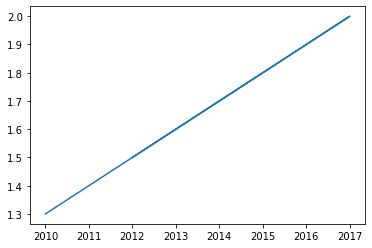

In [41]:
result=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(result)
plt.plot(X_test,Y_test)
plt.show()

<BarContainer object of 11 artists>

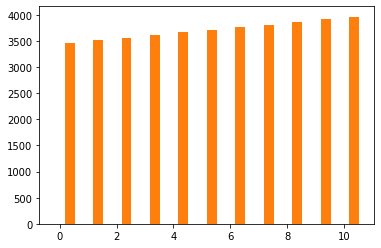

In [66]:
import numpy as np

N = 11
width = 0.35
ind = np.arange(N)
B1 = data1['YEAR'].values
B2 = data1['YEILD'].values
B3 = data1['PROFIT'].values
B4 = data1['COST OF CULTIVATION'].values

plt.bar(ind,B2,width, label='Men')
plt.bar(ind + width,B3,width, label='woMen')

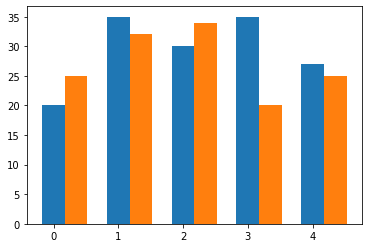

In [62]:
import numpy as np

N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')

# plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.legend(loc='best')
plt.show()